# QC Rainfall Observation Data

Made by Happy Trianna

### Objective :
- To do QC with the existed rainfall data from ground station
- To check and handle the outlier of the data
- To analyze the trend of all the station's data
- To analyze the stability mean, variance, and independence of the data

### Data
The data that we use is rainfall from ground station from the existed station in BBWS Pemali Juana.

### Import Libraries

In [33]:
import pandas as pd
import glob
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import pylab
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.datasets import co2
from statsmodels.tsa.seasonal import STL
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


### Data Loading

In [3]:
# load the dataset
dataset=pd.read_excel("D:/Happy/satellite_correction/uji_data_hujan_obs/PCH_bilibili/PCH_B_2010_2021.xlsx")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   TANGGAL                     4383 non-null   datetime64[ns]
 1   PCH STASIUN BILI-BILI       4367 non-null   float64       
 2   PCH STASIUN KAMPILI         3539 non-null   float64       
 3   PCH STASIUN KD1             4305 non-null   float64       
 4   PCH STASIUN LENGKESE        3424 non-null   float64       
 5   PCH STASIUN LIMBUNGA        4325 non-null   float64       
 6   PCH STASIUN MACINI SOMBALA  2659 non-null   float64       
 7   PCH STASIUN MALINO          4338 non-null   float64       
 8   PCH STASIUN MANGEMPANG      3848 non-null   float64       
 9   PCH STASIUN PANAIKANG       3979 non-null   float64       
 10  PCH STASIUN POS1            3953 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 376.8 KB

In [4]:
# get stations name from columns name
list_st=dataset.columns.values[1:]

We have 10 existed stations.

In [5]:
# preview the dataset
dataset.head()

,TANGGAL,PCH STASIUN BILI-BILI,PCH STASIUN KAMPILI,PCH STASIUN KD1,PCH STASIUN LENGKESE,PCH STASIUN LIMBUNGA,PCH STASIUN MACINI SOMBALA,PCH STASIUN MALINO,PCH STASIUN MANGEMPANG,PCH STASIUN PANAIKANG,PCH STASIUN POS1
0,2010-01-01,0.0,0.0,0.0,NaN,0.0,0.0,6.0,0.0,NaN,NaN
1,2010-01-02,5.0,0.0,4.0,NaN,1.0,0.0,48.0,22.0,NaN,NaN
2,2010-01-03,2.0,0.0,0.0,NaN,3.0,0.0,1.0,7.0,NaN,NaN
3,2010-01-04,8.0,24.0,18.0,NaN,8.0,9.0,4.0,9.0,NaN,NaN
4,2010-01-05,7.0,59.0,30.0,NaN,21.0,45.0,54.0,4.0,NaN,NaN


Now we have all the data in numerical format.\
Next, we will change the index into datetime index.

### Exploratory Data Analysis

In [21]:
df=dataset.set_index('TANGGAL')
df

,PCH STASIUN BILI-BILI,PCH STASIUN KAMPILI,PCH STASIUN KD1,PCH STASIUN LENGKESE,PCH STASIUN LIMBUNGA,PCH STASIUN MACINI SOMBALA,PCH STASIUN MALINO,PCH STASIUN MANGEMPANG,PCH STASIUN PANAIKANG,PCH STASIUN POS1
TANGGAL,,,,,,,,,,
2010-01-01,0.0,0.0,0.0,NaN,0.0,0.0,6.0,0.0,NaN,NaN
2010-01-02,5.0,0.0,4.0,NaN,1.0,0.0,48.0,22.0,NaN,NaN
2010-01-03,2.0,0.0,0.0,NaN,3.0,0.0,1.0,7.0,NaN,NaN
2010-01-04,8.0,24.0,18.0,NaN,8.0,9.0,4.0,9.0,NaN,NaN
2010-01-05,7.0,59.0,30.0,NaN,21.0,45.0,54.0,4.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,NaN,6.0,NaN,1.0,NaN,0.0,0.0,4.0,5.0
2021-12-28,1.0,NaN,20.0,NaN,29.0,NaN,0.0,32.0,29.0,32.0
2021-12-29,0.0,NaN,10.0,NaN,7.0,NaN,0.0,5.0,6.0,6.0


### Independence Test

We try to use Pearman's correlation in order to find dependencies for each station.

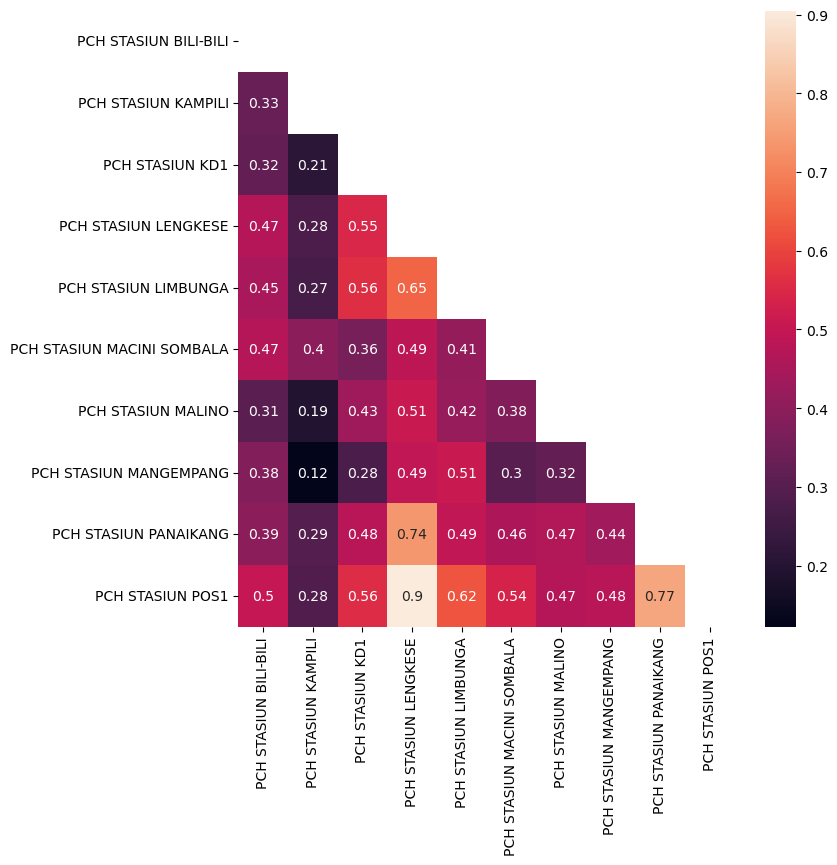

In [7]:
#Check the correlations
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True, mask=mask)
plt.show()

There is dependencies between `PCH STASIUN LENGKESE` VERSUS `PCH STASIUN POS 1`. We should decide wheter to choose one of these 2 stations.

### Outlier Test

In [9]:
# Function to find upper and lower boundaries for skewed distributed variables
# Let's calculate the boundaries outside which sit the outliers for skewed distributions
# Distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate the boundaries.

def find_skewed_boundaries(df, variable, distance,skew):
    
    if ((skew>=0.5) | (skew<=-0.5)):
    
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
        
    else:
        lower_boundary=df[variable].mean() - (df[variable].std()*3)
        upper_boundary=df[variable].mean() + (df[variable].std()*3)
        
    return upper_boundary, lower_boundary

# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

PCH STASIUN BILI-BILI
% Upper Outlier for PCH STASIUN BILI-BILI : 19.32%
% Lower Outlier for PCH STASIUN BILI-BILI : 0.00%
Skewness of PCH STASIUN BILI-BILI : 5.33%


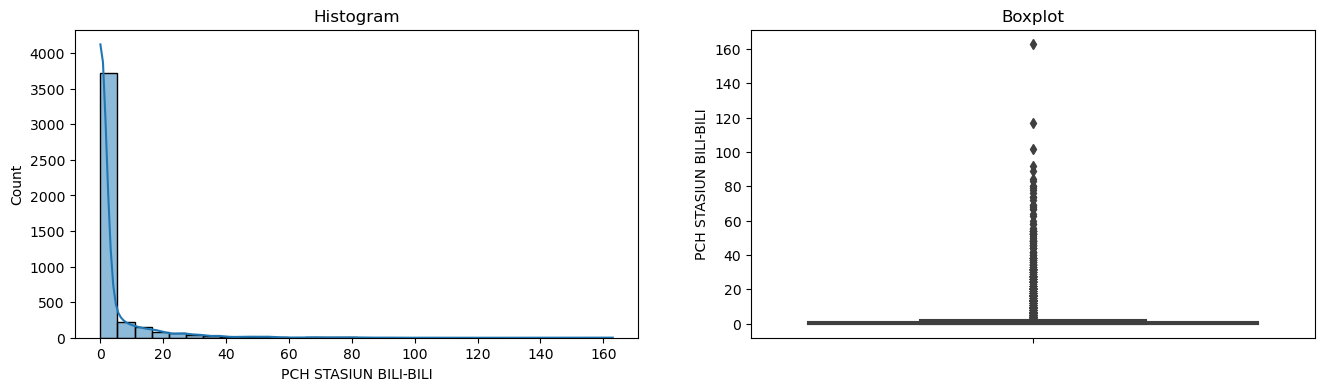

PCH STASIUN KAMPILI
% Upper Outlier for PCH STASIUN KAMPILI : 16.22%
% Lower Outlier for PCH STASIUN KAMPILI : 0.00%
Skewness of PCH STASIUN KAMPILI : 9.09%


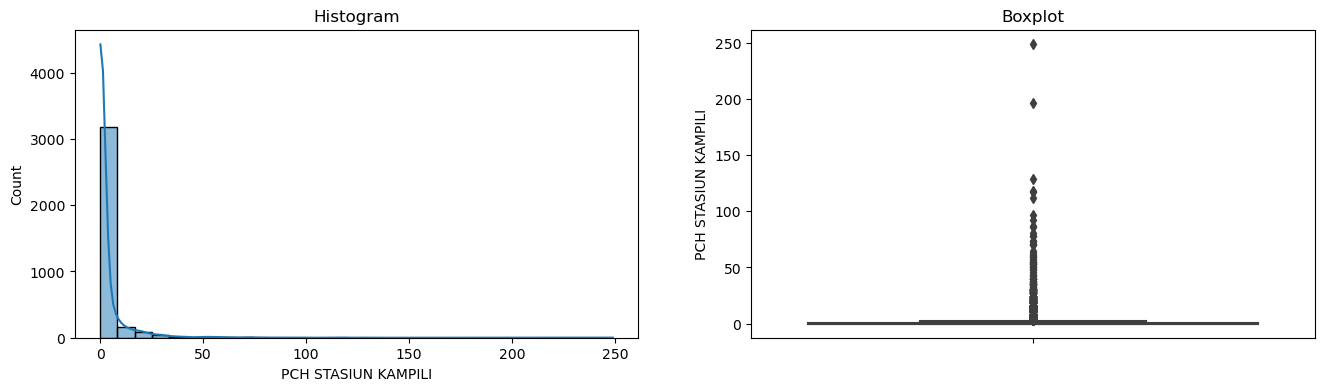

PCH STASIUN KD1
% Upper Outlier for PCH STASIUN KD1 : 14.37%
% Lower Outlier for PCH STASIUN KD1 : 0.00%
Skewness of PCH STASIUN KD1 : 5.56%


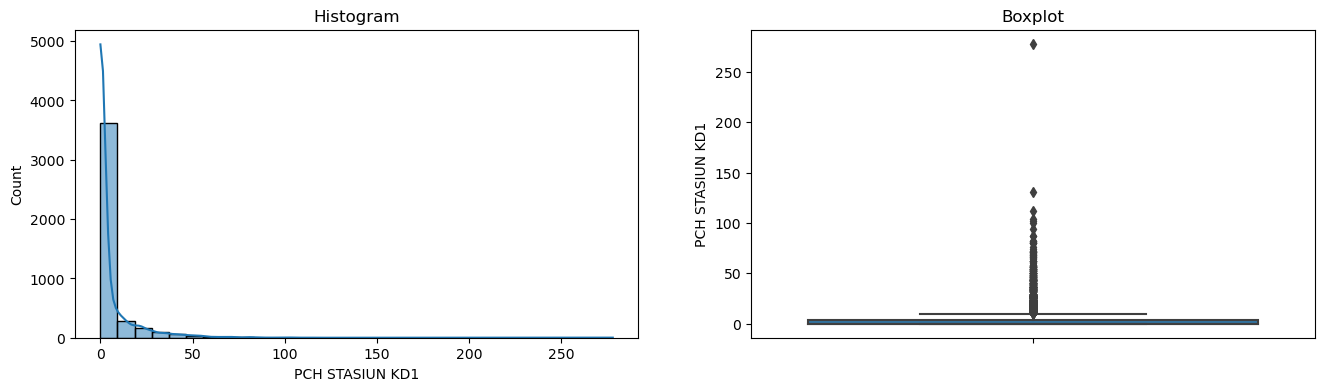

PCH STASIUN LENGKESE
% Upper Outlier for PCH STASIUN LENGKESE : 8.35%
% Lower Outlier for PCH STASIUN LENGKESE : 0.00%
Skewness of PCH STASIUN LENGKESE : 6.26%


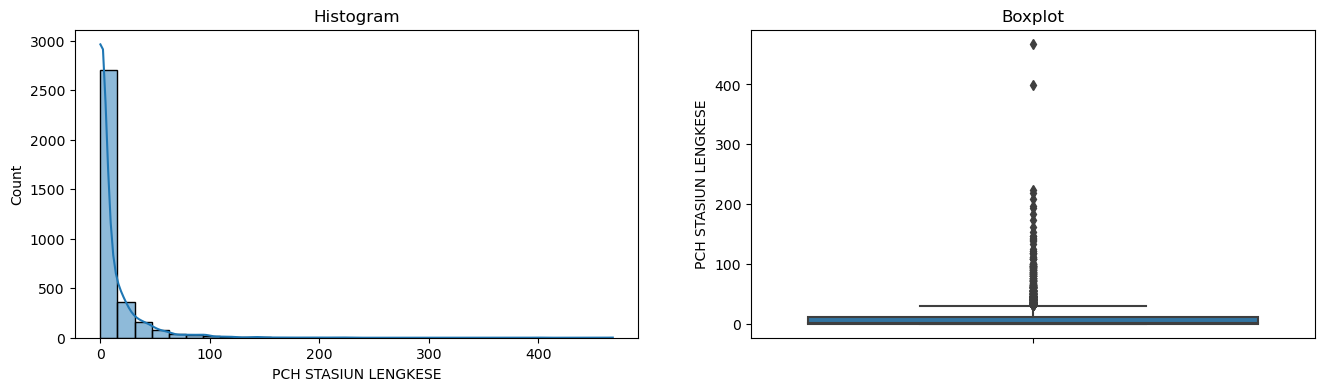

PCH STASIUN LIMBUNGA
% Upper Outlier for PCH STASIUN LIMBUNGA : 14.60%
% Lower Outlier for PCH STASIUN LIMBUNGA : 0.00%
Skewness of PCH STASIUN LIMBUNGA : 5.48%


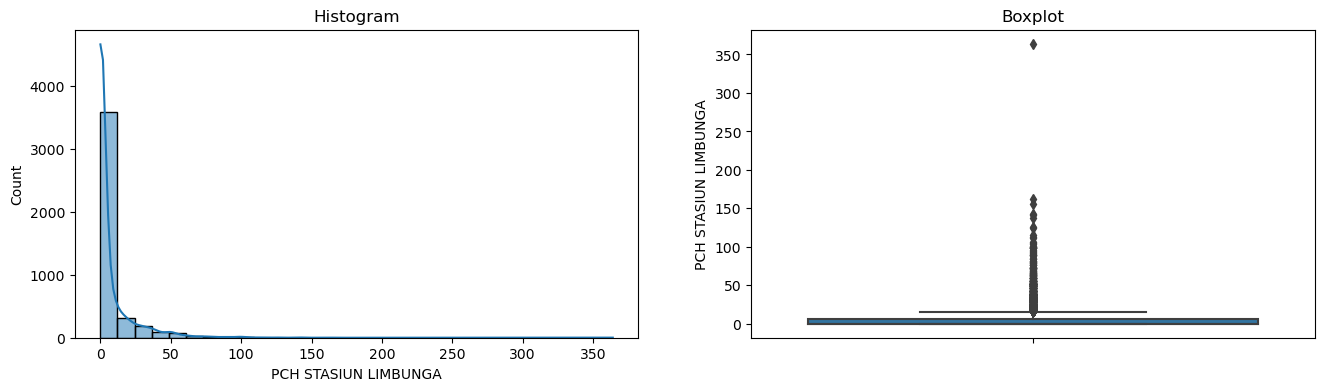

PCH STASIUN MACINI SOMBALA
% Upper Outlier for PCH STASIUN MACINI SOMBALA : 11.16%
% Lower Outlier for PCH STASIUN MACINI SOMBALA : 0.00%
Skewness of PCH STASIUN MACINI SOMBALA : 4.09%


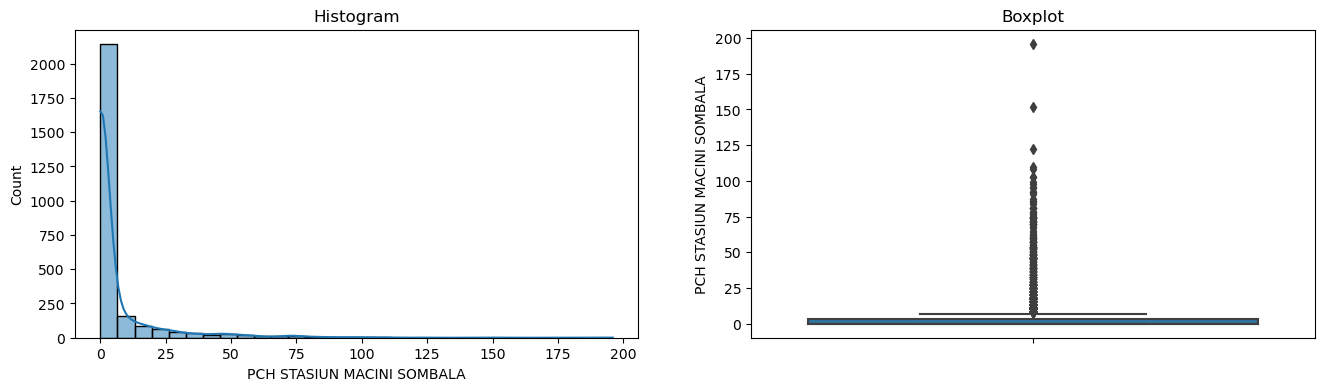

PCH STASIUN MALINO
% Upper Outlier for PCH STASIUN MALINO : 15.29%
% Lower Outlier for PCH STASIUN MALINO : 0.00%
Skewness of PCH STASIUN MALINO : 4.21%


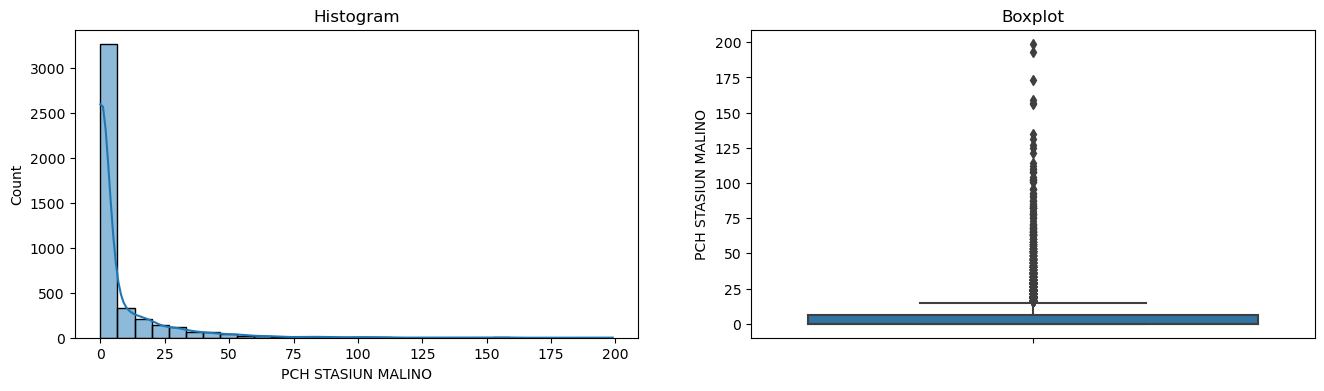

PCH STASIUN MANGEMPANG
% Upper Outlier for PCH STASIUN MANGEMPANG : 18.12%
% Lower Outlier for PCH STASIUN MANGEMPANG : 0.00%
Skewness of PCH STASIUN MANGEMPANG : 5.11%


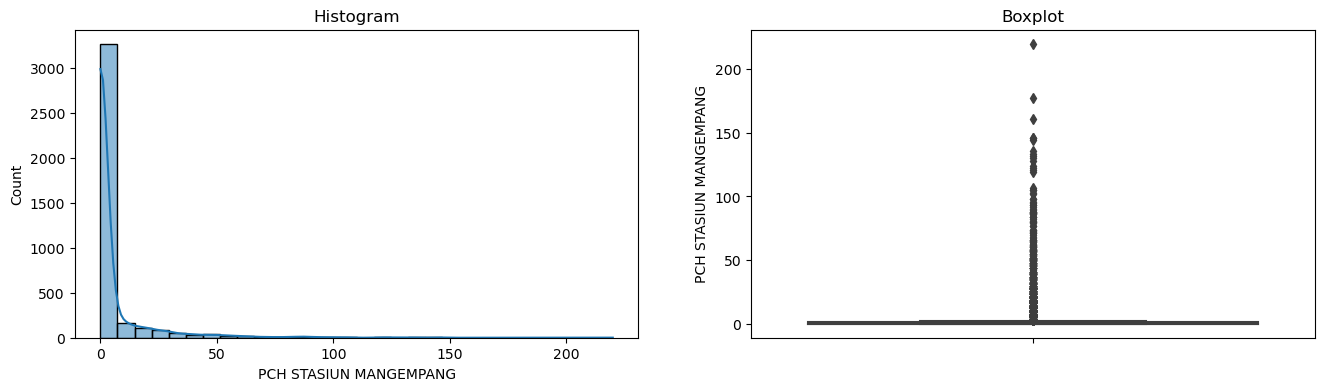

PCH STASIUN PANAIKANG
% Upper Outlier for PCH STASIUN PANAIKANG : 12.43%
% Lower Outlier for PCH STASIUN PANAIKANG : 0.00%
Skewness of PCH STASIUN PANAIKANG : 4.34%


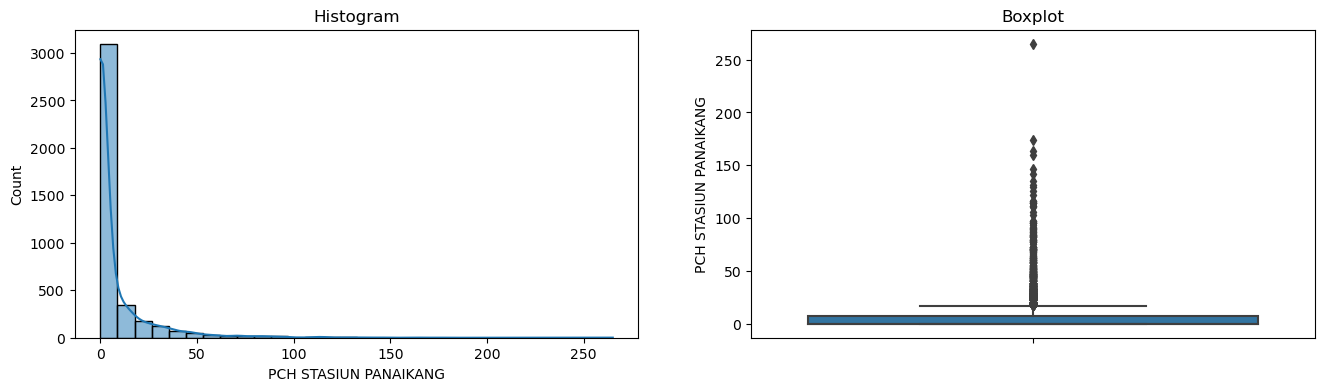

PCH STASIUN POS1
% Upper Outlier for PCH STASIUN POS1 : 11.70%
% Lower Outlier for PCH STASIUN POS1 : 0.00%
Skewness of PCH STASIUN POS1 : 5.82%


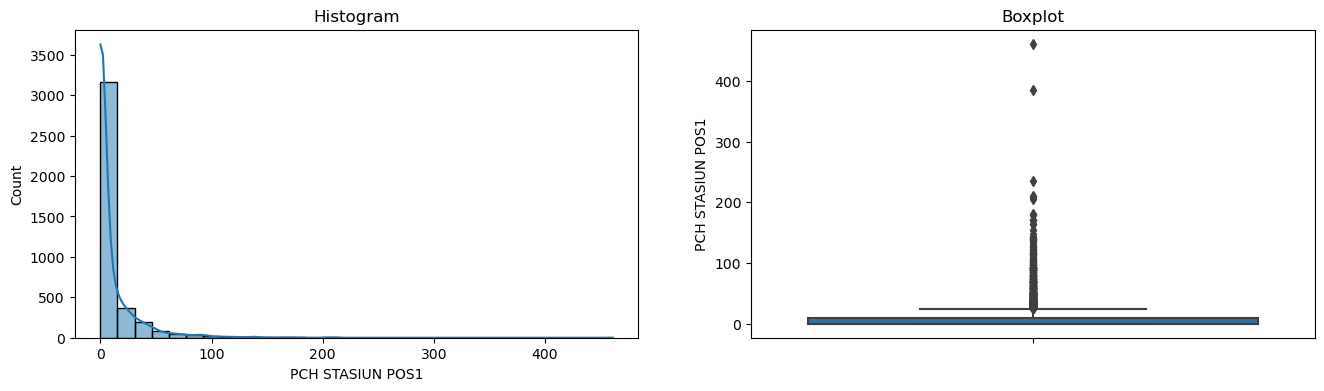

In [10]:
# Check the outlier in train data
for i in df.columns.values:
    globals()['Upper_'+i], globals()['Lower_'+i]=find_skewed_boundaries(df, i, 1.5,
                                                                                     df[i].skew())
    upper=globals()['Upper_'+i]
    lower=globals()['Lower_'+i]
    
    out_u=(len(df[df[i] > upper])/len(df) * 100)
    out_l=(len(df[df[i] < lower])/len(df) * 100)
    
    print(i)
    print('% Upper Outlier for '+i+' : {:.2f}%'.format(out_u))
    print('% Lower Outlier for '+i+' : {:.2f}%'.format(out_l))
    print('Skewness of '+i+' : {:.2f}%'.format(df[i].skew()))
    diagnostic_plots(df, i)
  

There are bunch of stations contain the outliers, now we will check what kind of outlier the stations have. For natural outlier, we can leave the data as it is, but for unnatural outlier, we will check the data correctness first and change the unnatural outlier into nan or leave as it is.

### Split the dataset into 3 datasets to analyze the stability mean and variance

In [11]:
# create the dataframe
df=pd.DataFrame({"date":pd.date_range(start="2010-01-01",end="2021-12-31")})
df.head()

,date
0,2010-01-01
1,2010-01-02
2,2010-01-03
3,2010-01-04
4,2010-01-05


We will use mass curve method to analyze the stability mean and variance of the dataset. *__Why use this method? Under the research of paper.__*

In [12]:
# append station name
for i in list_st:
    df[i]=dataset.loc[:,i]

# replacing the "-" character with nan value
df=df.replace('-', np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   date                        4383 non-null   datetime64[ns]
 1   PCH STASIUN BILI-BILI       4367 non-null   float64       
 2   PCH STASIUN KAMPILI         3539 non-null   float64       
 3   PCH STASIUN KD1             4305 non-null   float64       
 4   PCH STASIUN LENGKESE        3424 non-null   float64       
 5   PCH STASIUN LIMBUNGA        4325 non-null   float64       
 6   PCH STASIUN MACINI SOMBALA  2659 non-null   float64       
 7   PCH STASIUN MALINO          4338 non-null   float64       
 8   PCH STASIUN MANGEMPANG      3848 non-null   float64       
 9   PCH STASIUN PANAIKANG       3979 non-null   float64       
 10  PCH STASIUN POS1            3953 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 376.8 KB

In [13]:
df2=df.copy()
for i in range (1,df2.shape[0]):
    df2.iloc[i,1:]=np.nansum([df2.iloc[i-1,1:],df2.iloc[i,1:]],axis=0)
df2

,date,PCH STASIUN BILI-BILI,PCH STASIUN KAMPILI,PCH STASIUN KD1,PCH STASIUN LENGKESE,PCH STASIUN LIMBUNGA,PCH STASIUN MACINI SOMBALA,PCH STASIUN MALINO,PCH STASIUN MANGEMPANG,PCH STASIUN PANAIKANG,PCH STASIUN POS1
0,2010-01-01,0.0,0.0,0.00,NaN,0.0,0.0,6.0,0.0,NaN,NaN
1,2010-01-02,5.0,0.0,4.00,0.0,1.0,0.0,54.0,22.0,0.0,0.0
2,2010-01-03,7.0,0.0,4.00,0.0,4.0,0.0,55.0,29.0,0.0,0.0
3,2010-01-04,15.0,24.0,22.00,0.0,12.0,9.0,59.0,38.0,0.0,0.0
4,2010-01-05,22.0,83.0,52.00,0.0,33.0,54.0,113.0,42.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4378,2021-12-27,14430.0,11256.0,21609.23,36579.0,30978.0,15981.0,31126.0,19997.0,30021.0,40423.0
4379,2021-12-28,14431.0,11256.0,21629.23,36579.0,31007.0,15981.0,31126.0,20029.0,30050.0,40455.0
4380,2021-12-29,14431.0,11256.0,21639.23,36579.0,31014.0,15981.0,31126.0,20034.0,30056.0,40461.0
4381,2021-12-30,14431.0,11256.0,21663.23,36579.0,31042.0,15981.0,31126.0,20062.0,30074.0,40475.0


### Mass Curve

<Axes: xlabel='date'>

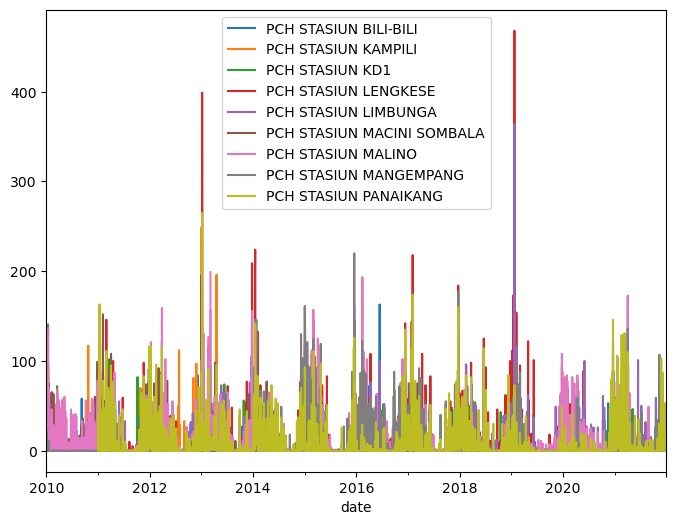

In [14]:
df.plot(x="date", y=df.columns[1:10].values,
        kind="line", figsize=(8, 6))

<Axes: xlabel='date'>

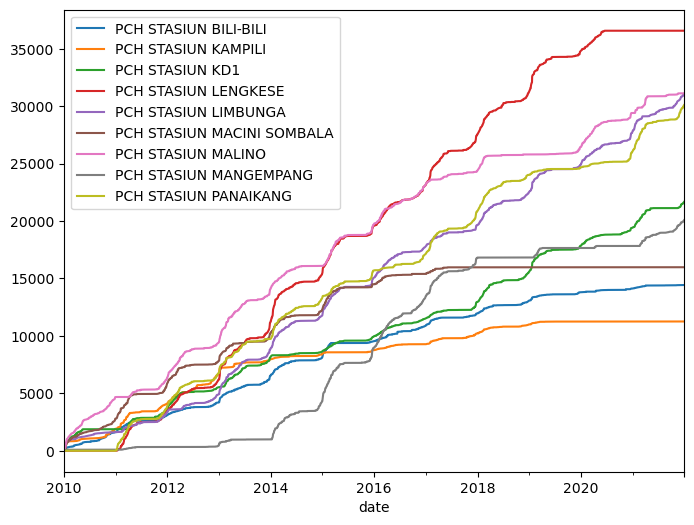

In [15]:
df2.plot(x="date", y=df2.columns[1:10].values,
        kind="line", figsize=(8, 6))

### Trend Test

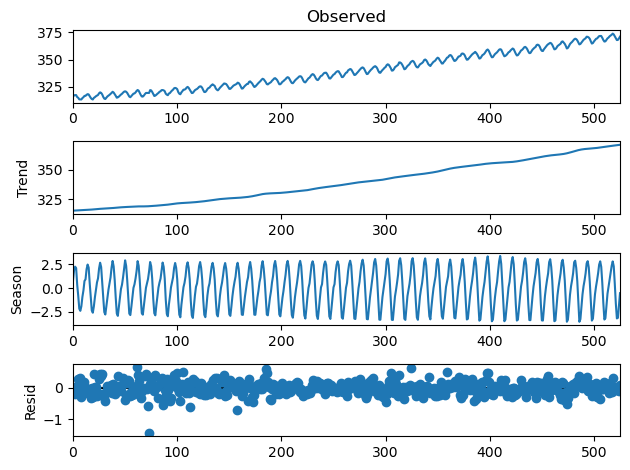

In [40]:
data = co2.load().data
data = data.resample('M').mean().ffill()

# Remove freq info
data.index = [i for i in range(data.shape[0])]

res = STL(data, period=12).fit()
res.plot()
plt.show()

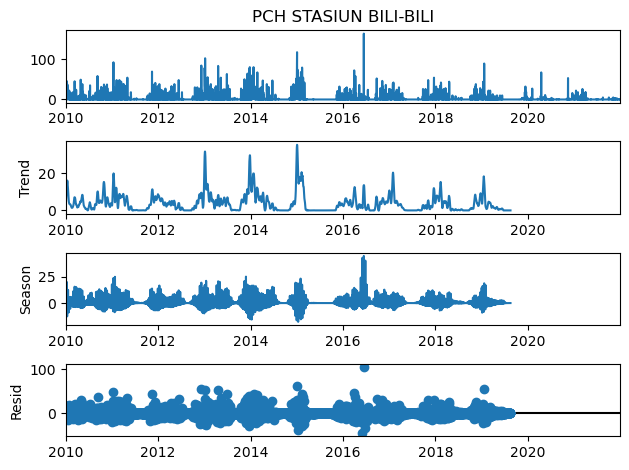

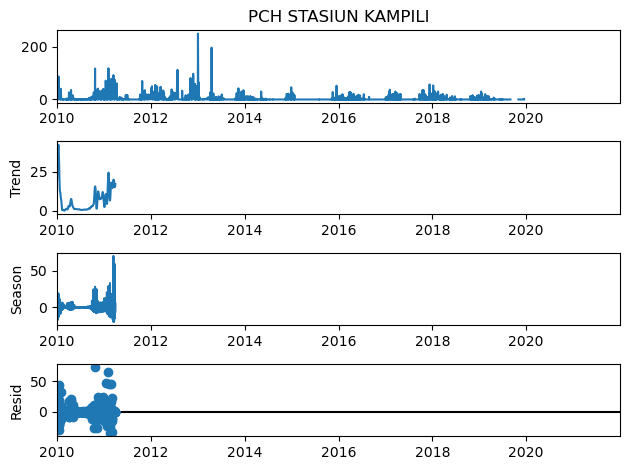

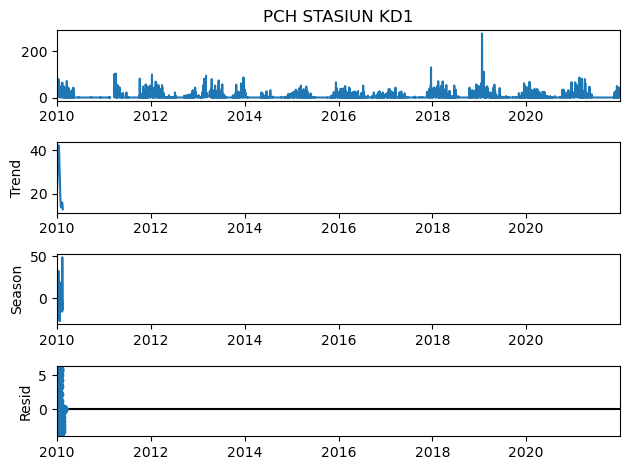

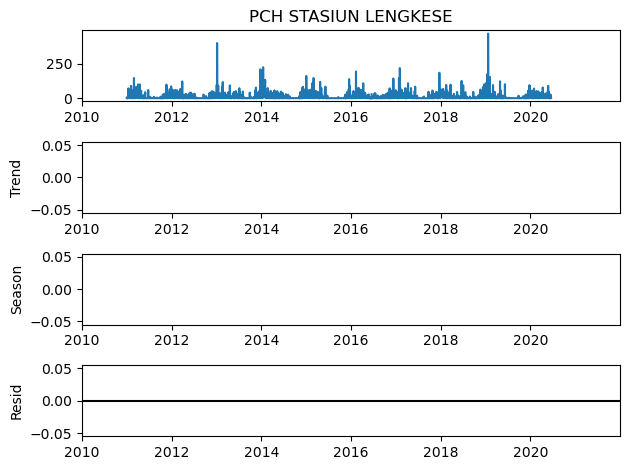

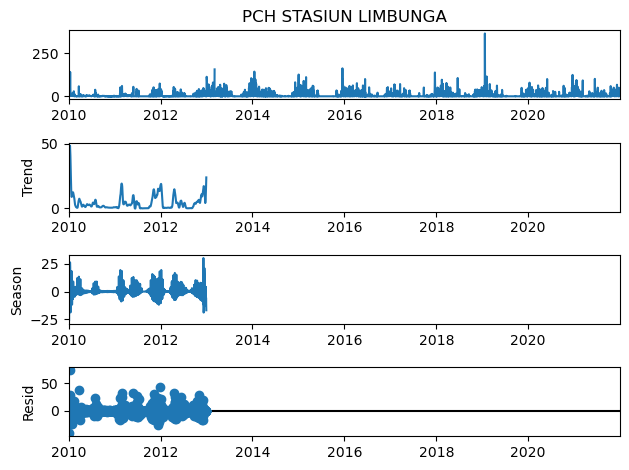

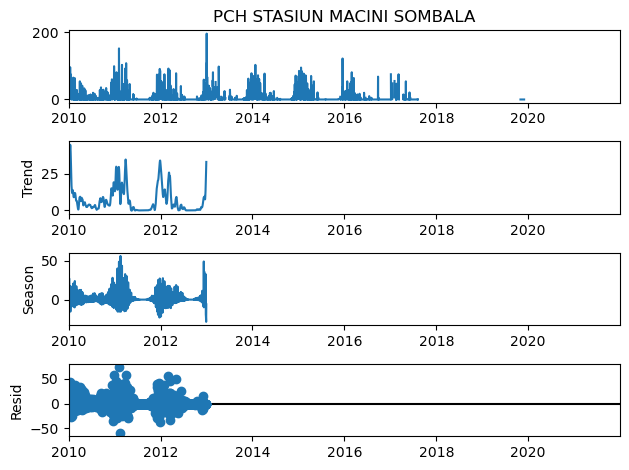

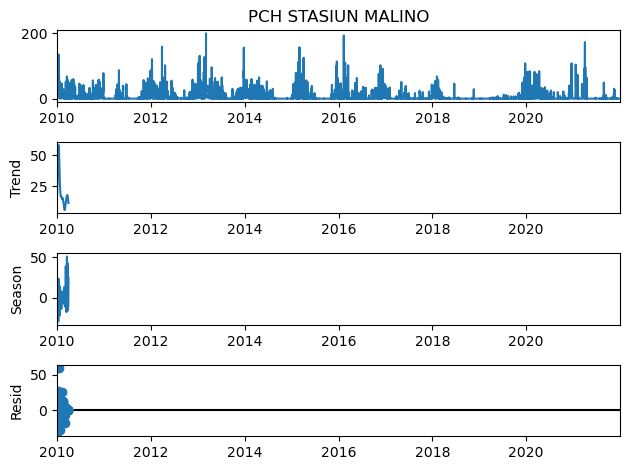

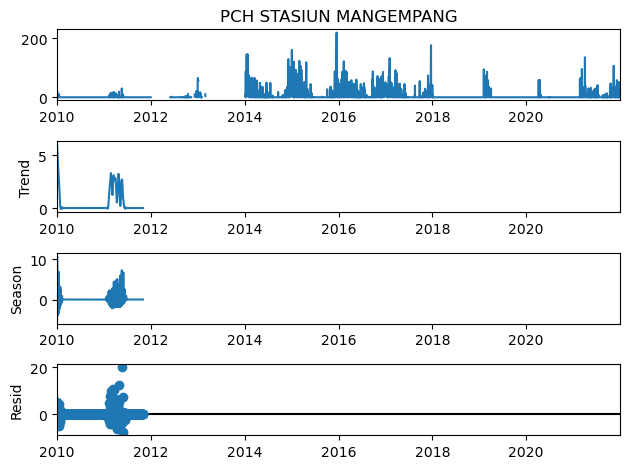

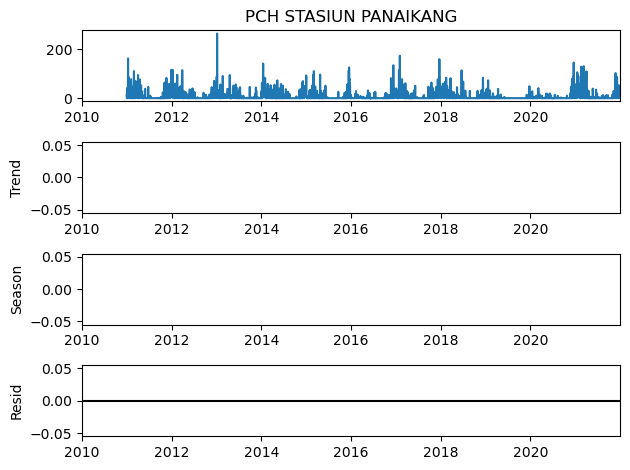

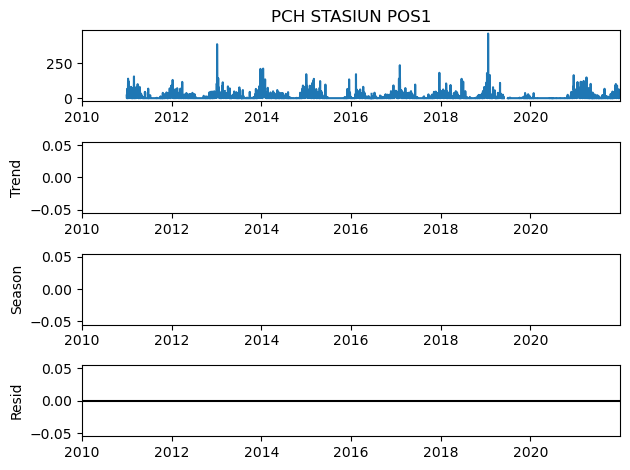

In [42]:
# Decomposing the time series
for i in df.columns.values:
    stl = STL(df.loc[:,i], period=12)
    res = stl.fit()
    fig = res.plot()